# 预训练模型预测-OCR下游任务之KIE

同济子豪兄 2023-6-20

## 导入工具包

In [1]:
from mmocr.apis import MMOCRInferencer

import cv2
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

## 载入模型，实例化MMOCRInferencer

In [14]:
# infer = MMOCRInferencer(det='dbnetpp', rec='svtr-small', kie='SDMGR')

infer = MMOCRInferencer(det='textsnake', rec='svtr-small', kie='SDMGR')

Loads checkpoint by http backend from path: https://download.openmmlab.com/mmocr/textdet/textsnake/textsnake_resnet50-oclip_fpn-unet_1200e_ctw1500/textsnake_resnet50-oclip_fpn-unet_1200e_ctw1500_20221101_134814-a216e5b2.pth
Loads checkpoint by http backend from path: https://download.openmmlab.com/mmocr/textrecog/svtr/svtr-small_20e_st_mj/svtr-small_20e_st_mj-35d800d6.pth
Loads checkpoint by http backend from path: https://download.openmmlab.com/mmocr/kie/sdmgr/sdmgr_unet16_60e_wildreceipt/sdmgr_unet16_60e_wildreceipt_20220825_151648-22419f37.pth
The model and loaded state dict do not match exactly

unexpected key in source state_dict: data_preprocessor.mean, data_preprocessor.std



## 载入预测图像

In [15]:
img_path = 'mmocr/demo/demo_kie.jpeg'

In [16]:
img_bgr = cv2.imread(img_path)

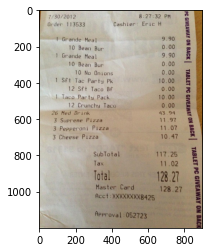

In [17]:
plt.imshow(img_bgr[:,:,::-1])
plt.show()

## 执行预测

In [18]:
result = infer(img_path, save_vis=True, return_vis=True)

Output()

/environment/miniconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty 
slice.
  out=out, **kwargs)

/environment/miniconda3/lib/python3.7/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value 
encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)

## 解析预测结果-文字区域及置信度

In [19]:
# result

In [20]:
result.keys()

dict_keys(['predictions', 'visualization'])

## 解析预测结果-文字区域可视化

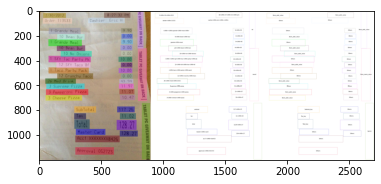

In [21]:
plt.imshow(result['visualization'][0])
plt.show()